<a href="https://colab.research.google.com/github/Kent2133-tech/WineQuality/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import & Load



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load DataSet

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/winequality-red.csv", sep=';')

#Google Drive Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Cleaning

In [ ]:
df.fillna(df.median(), inplace=True)

df.dropna(inplace=True)


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [ ]:
# Menghapus baris duplikat
df.drop_duplicates(inplace=True)


<ipython-input-9-9e76dc1e7c5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


#Display DataSet 5 teratas


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


#Deskripsi Data Set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         994 non-null    float64
 1   volatile acidity      994 non-null    float64
 2   citric acid           994 non-null    float64
 3   residual sugar        994 non-null    float64
 4   chlorides             994 non-null    float64
 5   free sulfur dioxide   994 non-null    float64
 6   total sulfur dioxide  994 non-null    float64
 7   density               994 non-null    float64
 8   pH                    994 non-null    float64
 9   sulphates             994 non-null    float64
 10  alcohol               994 non-null    float64
 11  quality               994 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 101.0 KB


In [ ]:
df.shape

(994, 12)

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,8.160060,0.522591,0.247757,2.198340,0.078462,15.010060,42.573441,0.996564,3.322928,0.629960,10.360614,5.613682
std,1.463006,0.166348,0.180136,0.449409,0.014493,8.792099,26.535221,0.001595,0.131781,0.114633,0.975374,0.728954
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992360,2.940000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995522,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,36.000000,0.996600,3.320000,0.610000,10.100000,6.000000
75%,9.000000,0.633750,0.397500,2.500000,0.087000,20.000000,56.750000,0.997600,3.400000,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.119000,42.000000,122.000000,1.001000,3.680000,0.980000,13.400000,7.000000


#Visualisasi Data

<ipython-input-15-6782209ee8f5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],hist_kws=dict(edgecolor="k", linewidth=1,color='grey'),color='red')
<ipython-input-15-6782209ee8f5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],hist_kws=dict(edgecolor="k", linewidth=1,color='gr

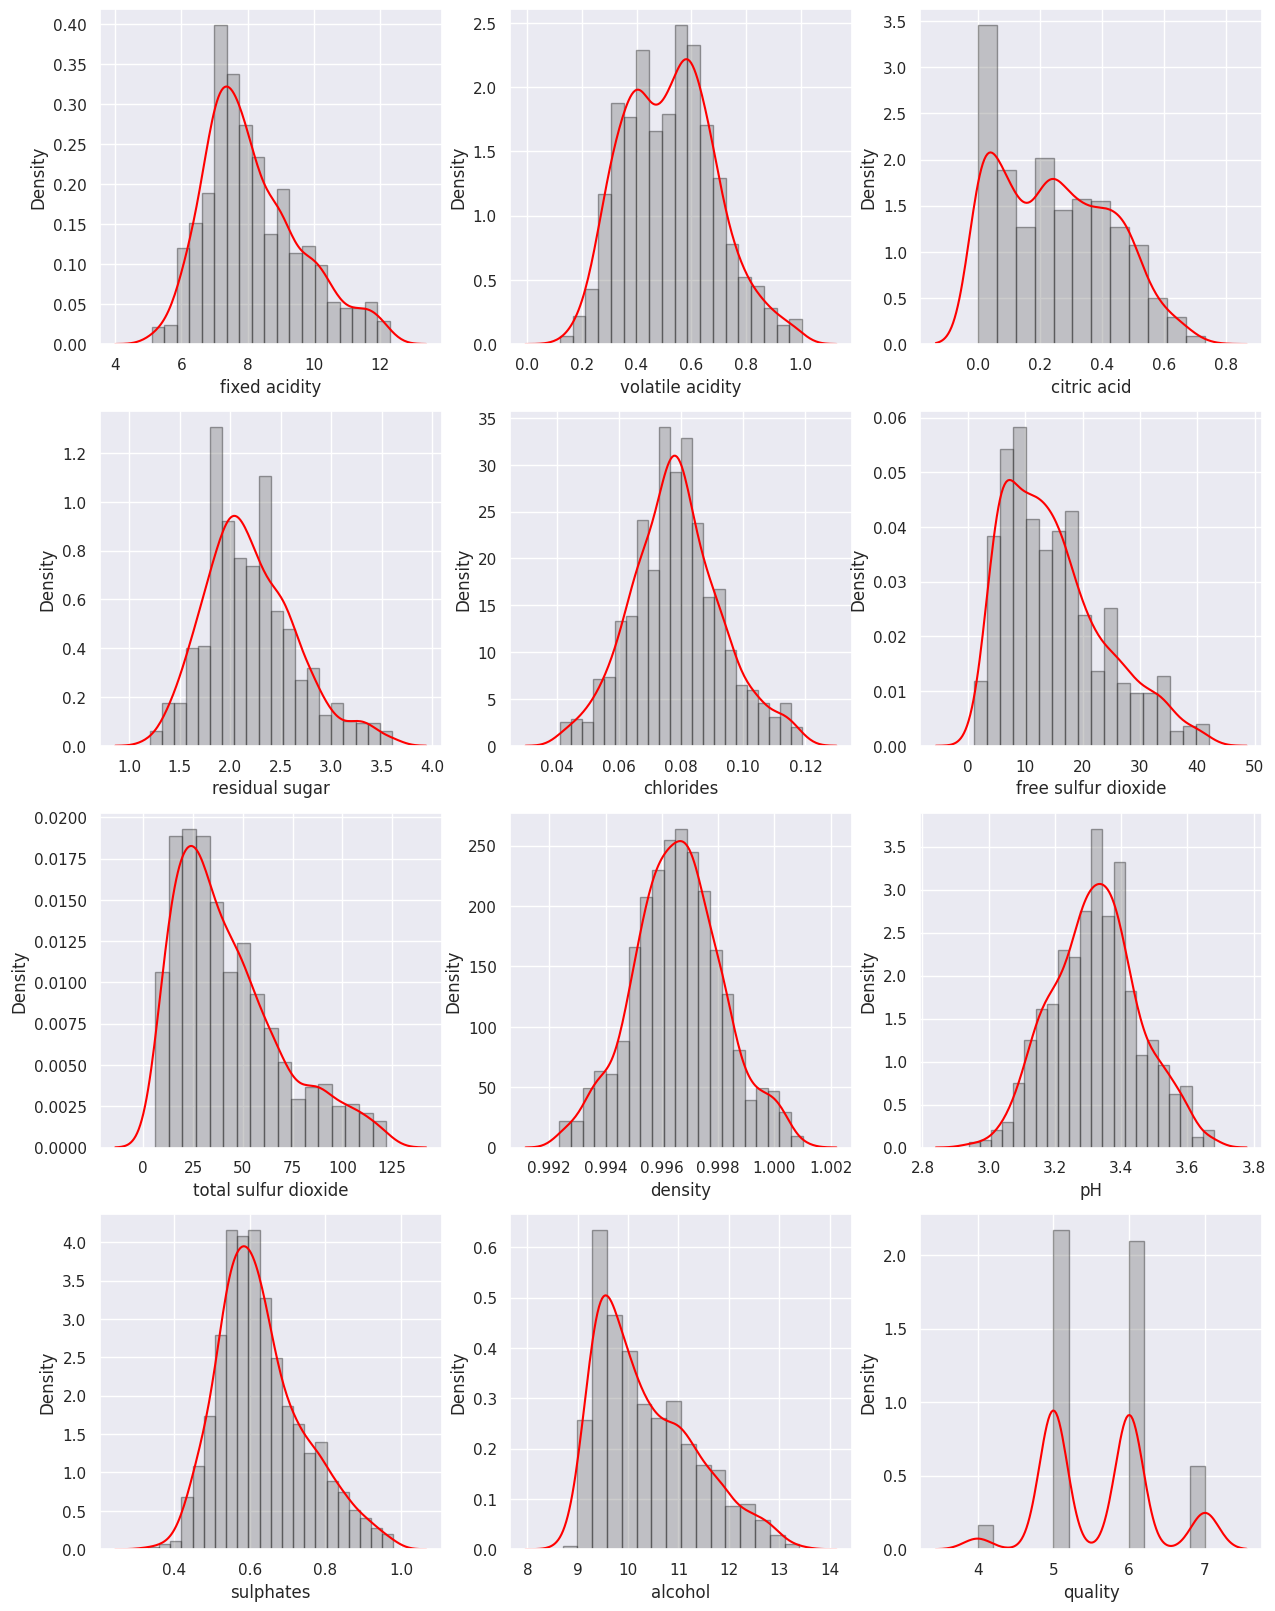

In [ ]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.distplot(df[col],hist_kws=dict(edgecolor="k", linewidth=1,color='grey'),color='red')
    cnt+=1
plt.show()

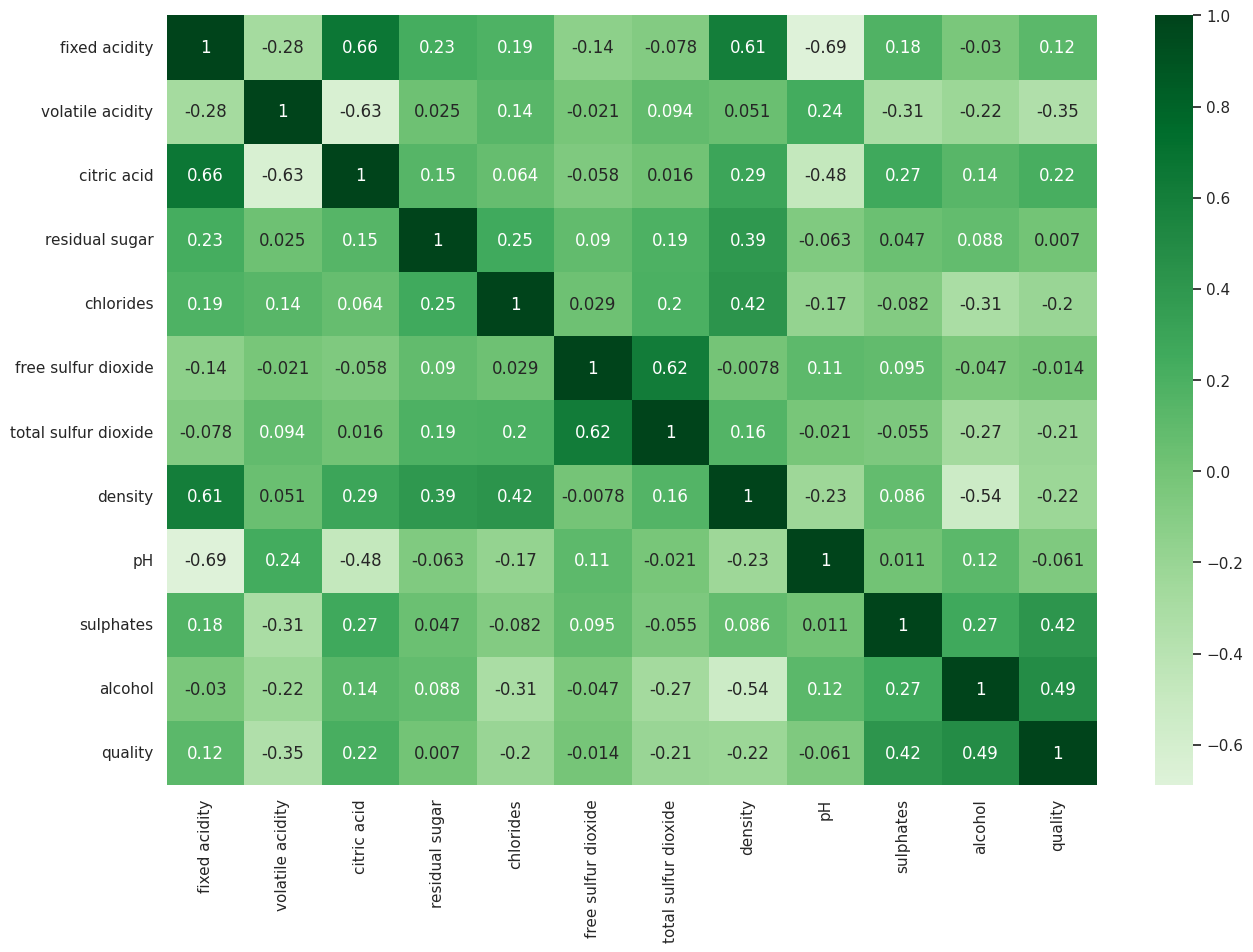

In [ ]:
fig = plt.figure(figsize = [15,10])
sns.heatmap(df.corr(),annot = True, cmap = 'Greens', center = 0)
plt.show()

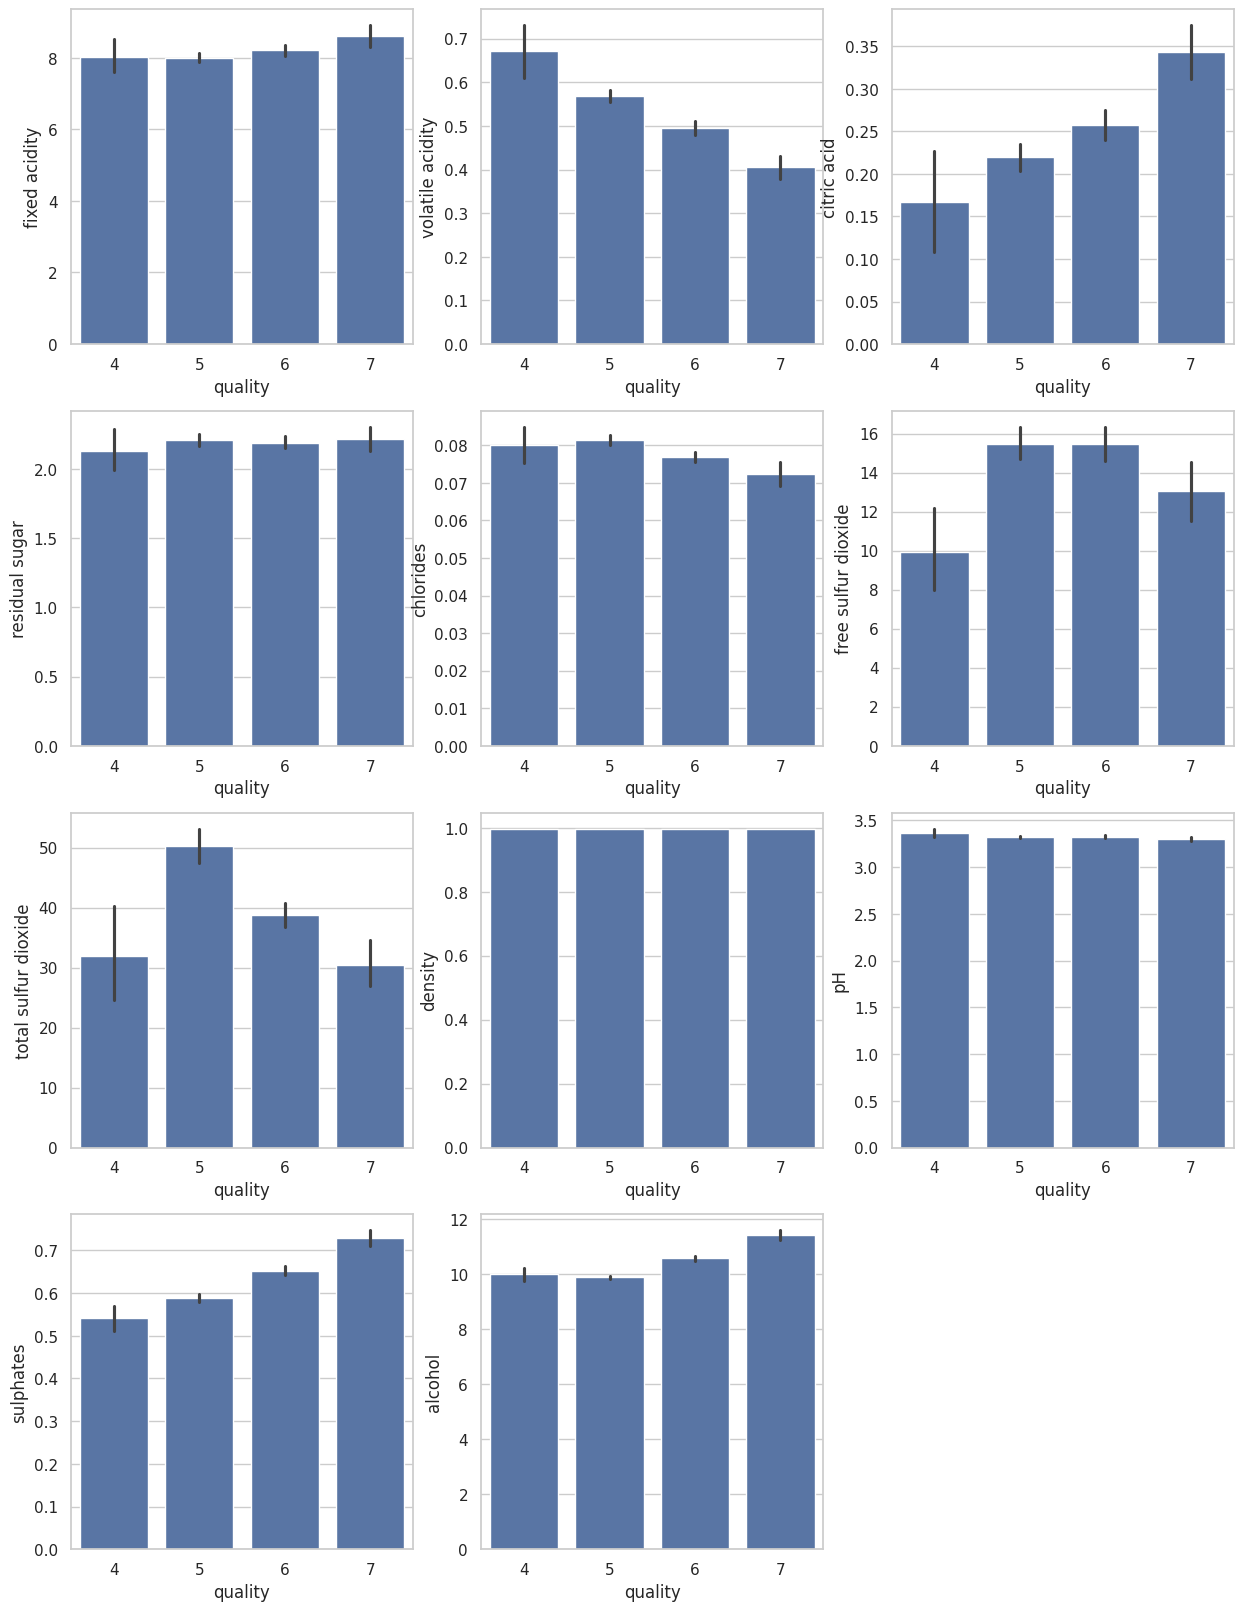

In [ ]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15,20])
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.barplot(data = df, x = 'quality', y = col)
    cnt+=1
plt.show()